In [15]:
# Financial Performance Analysis: End-to-End Project

# EDA & profit trend visualization
# Prophet-based forecasting & accuracy evaluation
# Scenario analysis (e.g., 10% expense increase)
# Anomaly detection using Isolation Forest
# Departmental profitability & ROI relationship analysis
# Executive summary with actionable insights

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

C:\Users\Kush baba the great\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [5]:
# Step 2: Load Dataset
df = pd.read_csv(r"D:\JOB\5 Performance analyst\2 Financial performance analyst\financial_performance_dataset.csv")
df['quarter'] = pd.to_datetime(df['quarter'])

In [6]:
# Step 3: Basic EDA
print(df.head())
print(df.describe())
print(df['department'].value_counts())

     quarter  department     expense_type    revenue   expenses  investment  \
0 2019-09-30   Marketing             COGS  413007.93  323842.39    73897.94   
1 2022-12-31   Marketing            Admin  420513.35  354958.68    57129.70   
2 2021-09-30     Finance        Utilities  527728.69  197346.58    39235.95   
3 2020-09-30       Sales  Marketing Spend  538899.79  311537.87    37609.48   
4 2019-12-31  Operations        Utilities  477607.42  291030.95    34847.73   

   roi_percentage  economic_index     profit  
0           0.140          119.73   89165.54  
1           0.216          103.35   65554.67  
2           0.154          103.61  330382.11  
3           0.169           89.59  227361.92  
4           0.213          114.30  186576.47  
             revenue       expenses     investment  roi_percentage  \
count   10000.000000   10000.000000   10000.000000    10000.000000   
mean   500658.569391  299662.903423   50060.673505        0.150554   
std     98913.651297   80596.2717

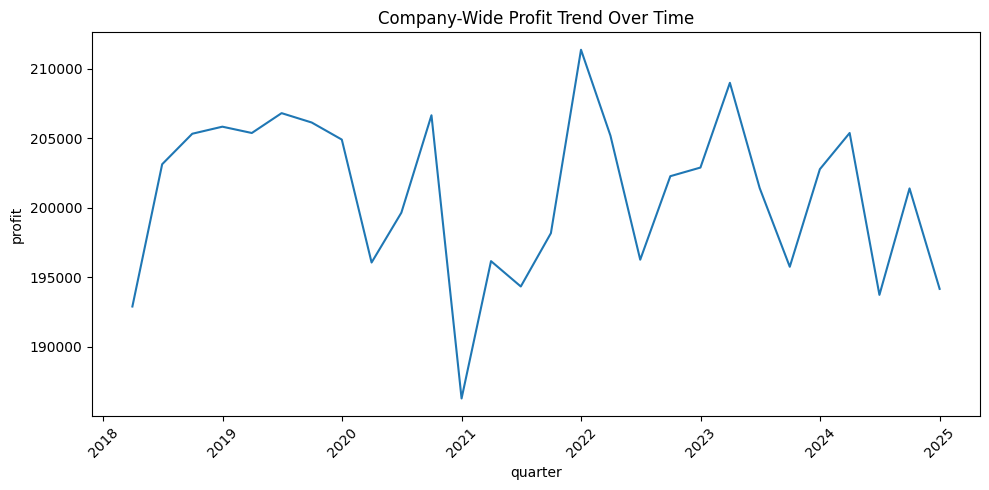

In [7]:
# Step 4: Visualize Profit Trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby('quarter')['profit'].mean().reset_index(), x='quarter', y='profit')
plt.title("Company-Wide Profit Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16:35:35 - cmdstanpy - INFO - Chain [1] start processing
16:35:35 - cmdstanpy - INFO - Chain [1] done processing


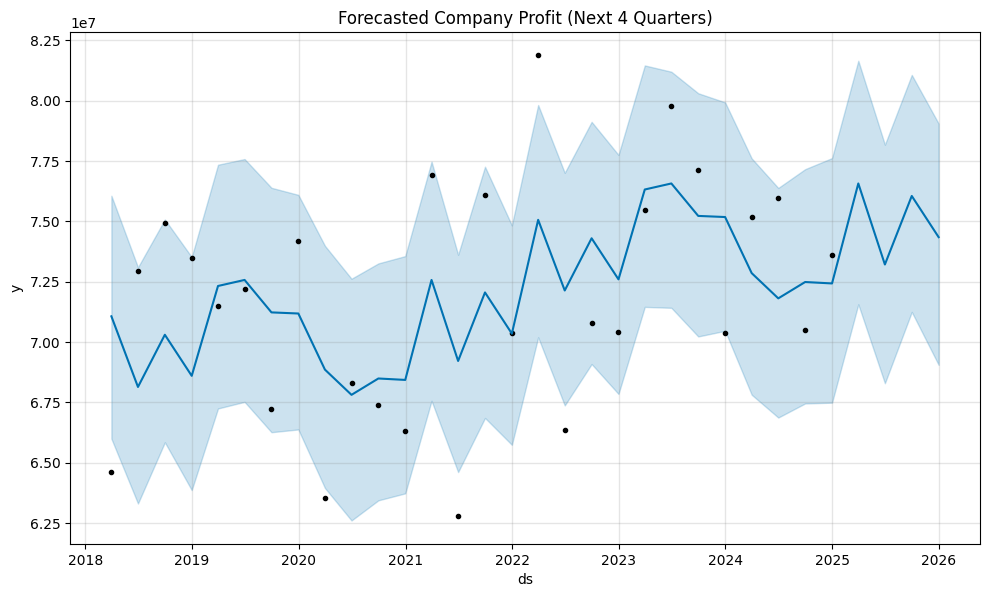

In [8]:
# Step 5: Forecasting Quarterly Profit Using Prophet
profit_ts = df.groupby('quarter')[['profit']].sum().reset_index()
profit_ts.columns = ['ds', 'y']

model = Prophet()
model.fit(profit_ts)
future = model.make_future_dataframe(periods=4, freq='Q')
forecast = model.predict(future)

model.plot(forecast)
plt.title("Forecasted Company Profit (Next 4 Quarters)")
plt.show()

In [9]:
# Step 6: Forecast Evaluation (backtest last 4 quarters)
past = forecast.iloc[-8:-4]
y_true = profit_ts['y'].iloc[-4:].values
y_pred = past['yhat'].values
print("MAPE:", mean_absolute_percentage_error(y_true, y_pred))
print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))

MAPE: 0.03240049571429578
RMSE: 2640977.359100774


In [10]:
# Step 7: Scenario Analysis (simulate +10% expenses)
df_scenario = df.copy()
df_scenario['expenses'] = df_scenario['expenses'] * 1.10
df_scenario['profit'] = df_scenario['revenue'] - df_scenario['expenses']
profit_diff = df_scenario['profit'].mean() - df['profit'].mean()
print("Average Profit Change with 10% Expense Increase:", profit_diff)

Average Profit Change with 10% Expense Increase: -29966.290342300083


In [11]:
# Step 8: Anomaly Detection on Expenses
iso = IsolationForest(contamination=0.01, random_state=42)
df['expense_anomaly'] = iso.fit_predict(df[['expenses']])
print("Anomaly Counts:", df['expense_anomaly'].value_counts())

Anomaly Counts:  1    9900
-1     100
Name: expense_anomaly, dtype: int64


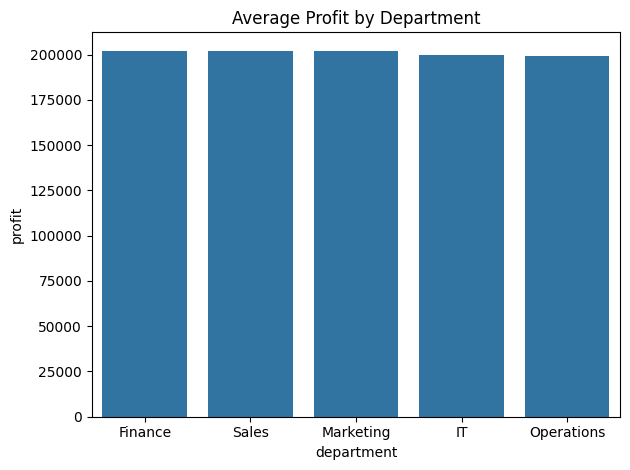

In [12]:
# Step 9: Department-wise Profitability Analysis
dept_profit = df.groupby('department')['profit'].mean().reset_index().sort_values(by='profit', ascending=False)
sns.barplot(data=dept_profit, x='department', y='profit')
plt.title("Average Profit by Department")
plt.tight_layout()
plt.show()

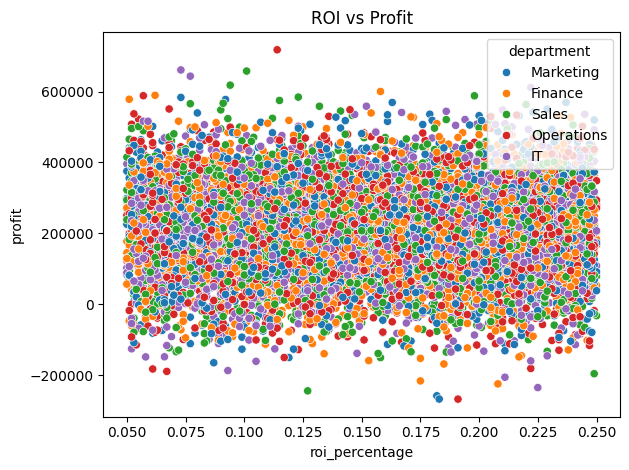

In [13]:
# Step 10: ROI vs Profit Relationship
sns.scatterplot(data=df, x='roi_percentage', y='profit', hue='department')
plt.title("ROI vs Profit")
plt.tight_layout()
plt.show()


In [14]:
# Step 11: Executive Summary Output
top_depts = dept_profit.head(2)
low_depts = dept_profit.tail(2)
print("\n--- Executive Summary ---")
print("Top Performing Departments:")
print(top_depts)
print("\nUnderperforming Departments:")
print(low_depts)
print("\nScenario Analysis Result: Average Profit Change =", round(profit_diff, 2))
print("\nAnomalies Detected in Expenses:", df[df['expense_anomaly'] == -1].shape[0])



--- Executive Summary ---
Top Performing Departments:
  department         profit
0    Finance  202167.522072
4      Sales  202036.826801

Underperforming Departments:
   department         profit
1          IT  199898.682452
3  Operations  199211.434232

Scenario Analysis Result: Average Profit Change = -29966.29

Anomalies Detected in Expenses: 100
